In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df = pd.read_csv("C:\\Users\\Yash Ladda\\Desktop\\DWDA Notes\\mini projectt\\JEE transformed cutoff.csv")  # Replace with your actual path if needed

print(df.shape)      # Check rows & columns
print(df.columns)    # Check column names
df.head()            # Preview first 5 rows

(64958, 13)
Index(['id', 'year', 'institute_type', 'round_no', 'quota', 'pool',
       'institute_name', 'branch', 'program_duration', 'degree_short',
       'category', 'opening_rank', 'closing_rank'],
      dtype='object')


,id,year,institute_type,round_no,quota,pool,institute_name,branch,program_duration,degree_short,category,opening_rank,closing_rank
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94


In [16]:
df.rename(columns={'pool': 'gender'}, inplace=True)
df.rename(columns={'degree_short': 'degree'}, inplace=True)
df.columns

Index(['id', 'year', 'institute_type', 'round_no', 'quota', 'gender',
       'institute_name', 'branch', 'program_duration', 'degree', 'category',
       'opening_rank', 'closing_rank'],
      dtype='object')

In [17]:
df['gender'].unique()

array(['Gender-Neutral', 'Female-Only'], dtype=object)

In [18]:
df['gender'] = df['gender'].replace({'Gender-Neutral': 'Both'})
df['gender'] = df['gender'].replace({'Female-Only': 'Female'})
df.head()

,id,year,institute_type,round_no,quota,gender,institute_name,branch,program_duration,degree,category,opening_rank,closing_rank
0,1,2016,IIT,6,AI,Both,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841
1,2,2016,IIT,6,AI,Both,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098
2,3,2016,IIT,6,AI,Both,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468
3,4,2016,IIT,6,AI,Both,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145
4,5,2016,IIT,6,AI,Both,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94


In [19]:
df['year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [20]:
drop_cols = ['id', 'program_duration']  # Optional

In [21]:
categorical_cols = [
    'institute_type',
    'quota',
    'gender',
    'institute_name',
    'branch',
    'degree',
    'category'
]

mapping_set = {}

for col in categorical_cols:
    maps = LabelEncoder()
    df[col] = maps.fit_transform(df[col])
    mapping_set[col] = maps  # Save encoders for future predictions


In [22]:
df.head()

,id,year,institute_type,round_no,quota,gender,institute_name,branch,program_duration,degree,category,opening_rank,closing_rank
0,1,2016,0,6,0,0,4,0,4 Years,4,0,838,1841
1,2,2016,0,6,0,0,4,0,4 Years,4,4,408,1098
2,3,2016,0,6,0,0,4,0,4 Years,4,6,297,468
3,4,2016,0,6,0,0,4,0,4 Years,4,8,79,145
4,5,2016,0,6,0,0,4,0,4 Years,4,3,94,94


In [23]:
features = ['year', 'round_no', 'quota', 'gender', 'institute_name', 'branch', 'category']
target = 'closing_rank'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE):        {mae:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse:.2f}")
print(f"R² Score (coefficient of determination): {r2:.4f}")

Mean Absolute Error (MAE):        834.26
Root Mean Squared Error (RMSE):   9096.68
R² Score (coefficient of determination): 0.9397


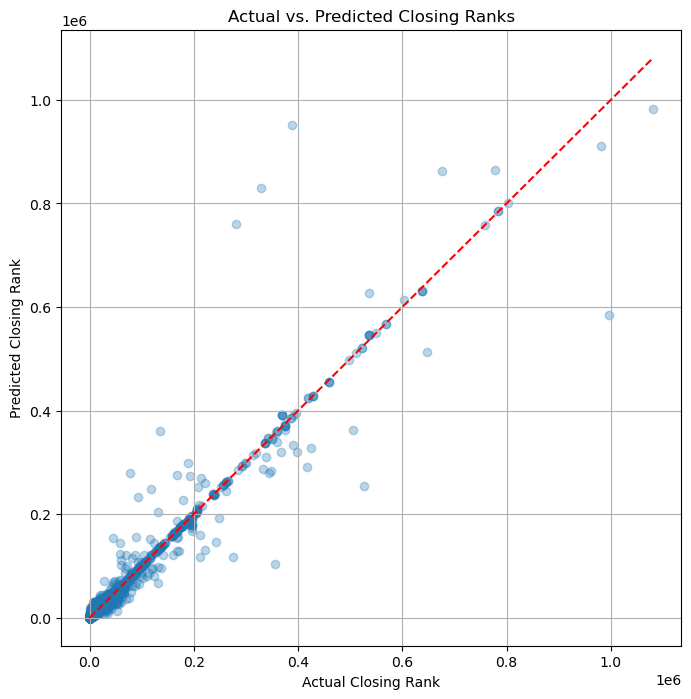

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Closing Rank")
plt.ylabel("Predicted Closing Rank")
plt.title("Actual vs. Predicted Closing Ranks")
plt.grid(True)
plt.show()

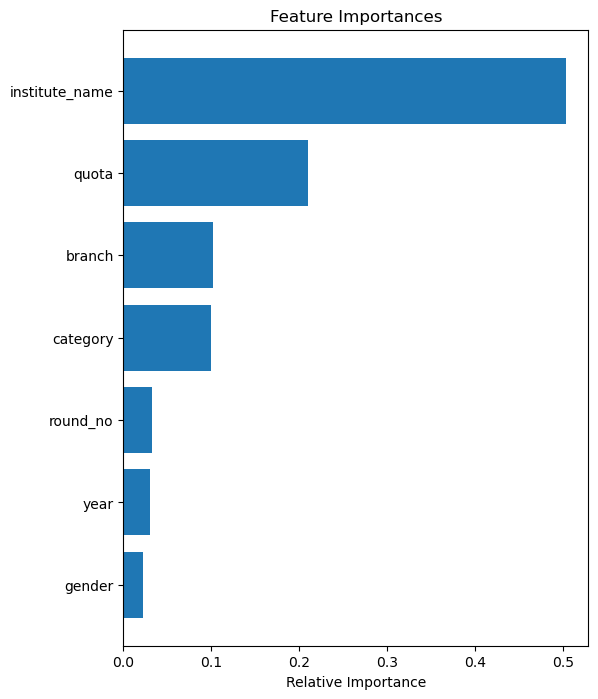

In [28]:
importances = model.feature_importances_
feat_names = X_train.columns

fi_df = pd.DataFrame({
    'feature': feat_names,
    'importance': importances
}).sort_values('importance', ascending=True)

plt.figure(figsize=(6,8))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.show()

In [29]:
df['new_log_closing_rank'] = np.log1p(df['closing_rank'])  # log(1 + x)

In [30]:
new_features = ['year', 'round_no', 'quota', 'gender', 'institute_name', 'branch', 'category']
new_target = 'new_log_closing_rank'

new_X = df[new_features]
new_y = df[new_target]

In [31]:
from sklearn.model_selection import train_test_split

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

new_model = RandomForestRegressor(n_estimators=100, random_state=42)
new_model.fit(new_X_train, new_y_train)

RandomForestRegressor(random_state=42)

In [33]:
new_y_pred_log = new_model.predict(new_X_test)

# Convert back from log scale
new_y_pred = np.expm1(new_y_pred_log)
new_y_test_original = np.expm1(new_y_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

new_mae  = mean_absolute_error(new_y_test_original, new_y_pred)
new_rmse = np.sqrt(mean_squared_error(new_y_test_original, new_y_pred))
new_r2   = r2_score(new_y_test_original, new_y_pred)

print(f"New MAE:  {new_mae:.2f}")
print(f"New RMSE: {new_rmse:.2f}")
print(f"New R² Score: {new_r2:.4f}")

New MAE:  810.06
New RMSE: 7965.85
New R² Score: 0.9538


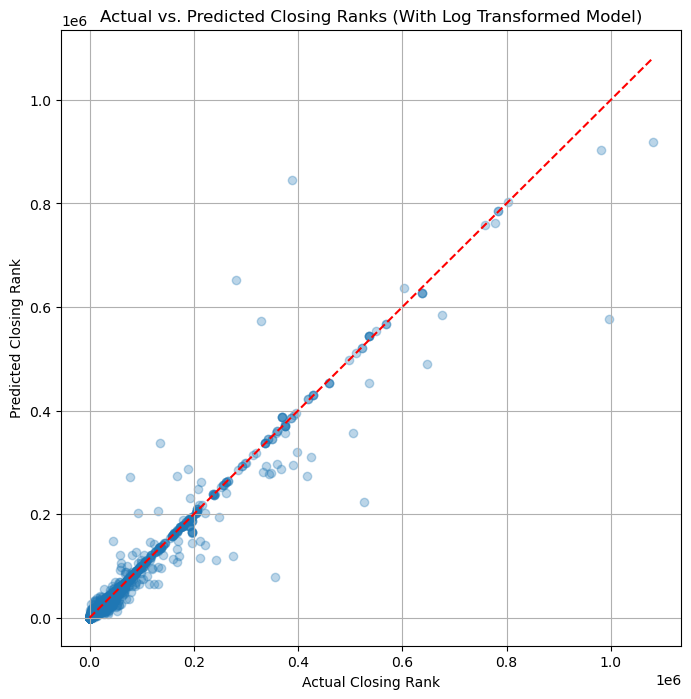

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(new_y_test_original, new_y_pred, alpha=0.3)
plt.plot([new_y_test_original.min(), new_y_test_original.max()],
         [new_y_test_original.min(), new_y_test_original.max()], 'r--')
plt.xlabel("Actual Closing Rank")
plt.ylabel("Predicted Closing Rank")
plt.title("Actual vs. Predicted Closing Ranks (With Log Transformed Model)")
plt.grid(True)
plt.show()

In [36]:
df[df['closing_rank'] > 950000]
# df['closing_rank'].max()

,id,year,institute_type,round_no,quota,gender,institute_name,branch,program_duration,degree,category,opening_rank,closing_rank,new_log_closing_rank
36173,20605,2019,1,7,3,0,38,57,4 Years,4,0,505253,1032762,13.847748
36181,20613,2019,1,7,3,0,38,98,4 Years,4,0,205799,961708,13.776467
36197,20629,2019,1,7,3,0,40,42,4 Years,4,0,161870,1144790,13.950733
36205,20637,2019,1,7,3,0,40,57,4 Years,4,0,1082601,1082601,13.894878
36215,20646,2019,1,7,3,0,40,98,4 Years,4,0,1081509,1081509,13.893869
36223,20654,2019,1,7,3,1,40,55,4 Years,4,0,1029730,1029730,13.844808
40517,25477,2020,1,6,3,1,40,57,4 Years,4,0,685982,996637,13.812143
40526,25486,2020,1,6,3,0,40,98,4 Years,4,0,540582,981581,13.796921


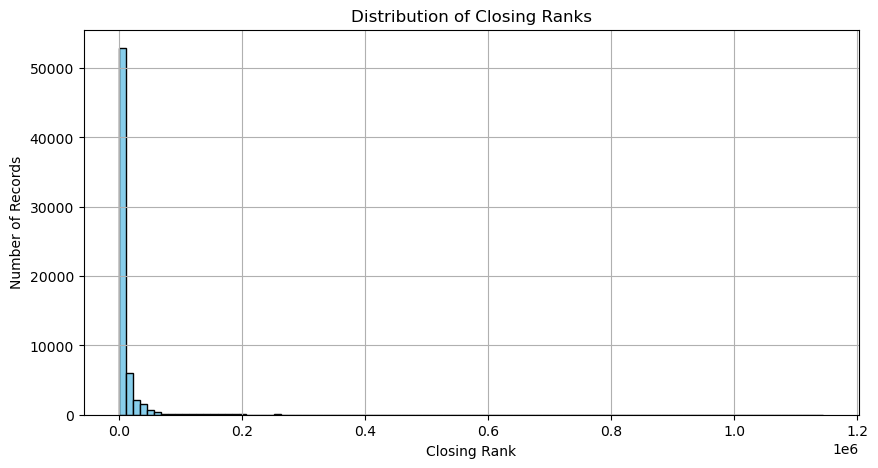

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df['closing_rank'], bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Closing Ranks")
plt.xlabel("Closing Rank")
plt.ylabel("Number of Records")
plt.grid(True)
plt.show()

In [38]:
# Remove outliers from original DataFrame and save as another version
df_another_cleaned = df[df['closing_rank'] <= 950000].copy()

In [39]:
df_another_cleaned['another_log_closing_rank'] = np.log1p(df_another_cleaned['closing_rank'])

In [40]:
another_features = ['year', 'round_no', 'quota', 'gender', 'institute_name', 'branch', 'category']
another_target = 'another_log_closing_rank'

another_X = df_another_cleaned[another_features]
another_y = df_another_cleaned[another_target]

In [41]:
from sklearn.model_selection import train_test_split

another_X_train, another_X_test, another_y_train, another_y_test = train_test_split(another_X, another_y, test_size=0.3, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestRegressor

another_model = RandomForestRegressor(n_estimators=100, random_state=42)
another_model.fit(another_X_train, another_y_train)

RandomForestRegressor(random_state=42)

In [43]:
import numpy as np

another_y_pred_log = another_model.predict(another_X_test)

another_y_pred = np.expm1(another_y_pred_log)
another_y_test_original = np.expm1(another_y_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

another_mae  = mean_absolute_error(another_y_test_original, another_y_pred)
another_rmse = np.sqrt(mean_squared_error(another_y_test_original, another_y_pred))
another_r2   = r2_score(another_y_test_original, another_y_pred)

print(f"Another MAE after outlier removal:  {another_mae:.2f}")
print(f"Another RMSE after outlier removal: {another_rmse:.2f}")
print(f"Another R² Score after outlier removal: {another_r2:.4f}")

Another MAE after outlier removal:  790.28
Another RMSE after outlier removal: 7437.76
Another R² Score after outlier removal: 0.9568


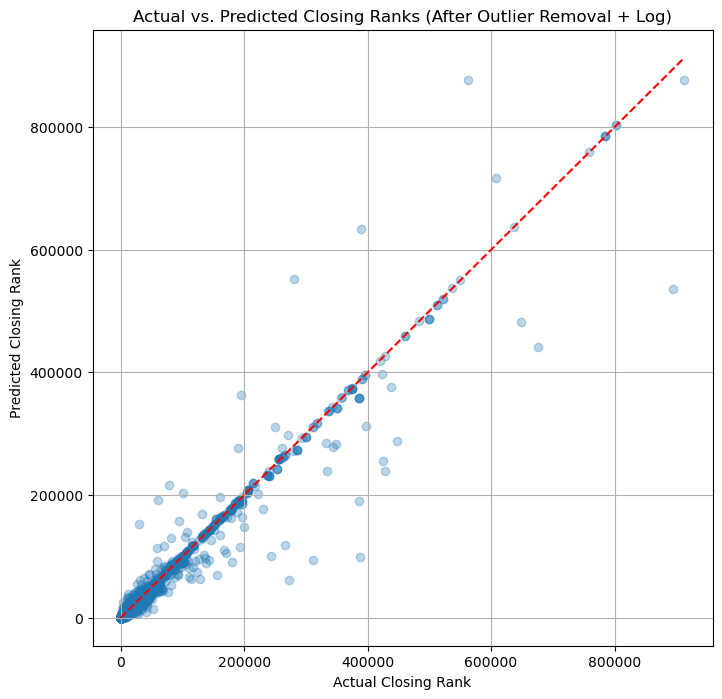

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(another_y_test_original, another_y_pred, alpha=0.3)
plt.plot([another_y_test_original.min(), another_y_test_original.max()],
         [another_y_test_original.min(), another_y_test_original.max()], 'r--')
plt.xlabel("Actual Closing Rank")
plt.ylabel("Predicted Closing Rank")
plt.title("Actual vs. Predicted Closing Ranks (After Outlier Removal + Log)")
plt.grid(True)
plt.show()

In [46]:
import joblib

# Original model
joblib.dump(new_model, 'log_transformed_model.pkl')

# Model after outlier removal
joblib.dump(another_model, 'outlier_removed_n_log_transformed_model.pkl')

['outlier_removed_n_log_transformed_model.pkl']

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For loading the saved model

In [48]:
# print(model.feature_names_in_)  # shows expected column names


In [49]:
import pandas as pd
import joblib

# Step 1: Load your model
model = joblib.load("C:\\Users\\Yash Ladda\\Desktop\\DWDA Notes\\mini projectt\\log_transformed_model.pkl")

# Step 2: Manually enter input data (example below)
# ⚠️ Make sure column names and order match what the model was trained on

input_data = {
    'year' : [2020],
    'round_no' : [6],
    'quota': ['HS'],
    'gender': ['Gender-Neutral'],
    'institute_name': ['NIT-Jamshedpur'],
    'branch': ['Production and Industrial Engineering'],
    'category': ['GEN'],
    # 'rank': [1234] madarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr bhai i/p data diya hee nahi tha as a featureeeeeeeeeeeeeeeeeeeeeeeee
}

# Step 3: Create DataFrame
input_df = pd.DataFrame(input_data)

for col in categorical_cols:
    le = mapping_set[col]
    if col in input_df.columns:
        # Make sure values exist in the encoder classes
        input_df[col] = input_df[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1  # or np.nan
        )

# Now predict
# predicted_rank = model.predict(input_df)
predicted_log_rank = model.predict(input_df)
predicted_rank = np.exp(predicted_log_rank)

print(f"📢 Predicted Closing Rank for Next Year: {int(predicted_rank[0])}")



📢 Predicted Closing Rank for Next Year: 47353


In [50]:
df.head()

,id,year,institute_type,round_no,quota,gender,institute_name,branch,program_duration,degree,category,opening_rank,closing_rank,new_log_closing_rank
0,1,2016,0,6,0,0,4,0,4 Years,4,0,838,1841,7.518607
1,2,2016,0,6,0,0,4,0,4 Years,4,4,408,1098,7.002156
2,3,2016,0,6,0,0,4,0,4 Years,4,6,297,468,6.150603
3,4,2016,0,6,0,0,4,0,4 Years,4,8,79,145,4.983607
4,5,2016,0,6,0,0,4,0,4 Years,4,3,94,94,4.553877


In [51]:
import joblib

# Save encoders to a file
joblib.dump(mapping_set, "encoders.pkl")
print("Encoders saved as encoders.pkl")

Encoders saved as encoders.pkl


In [55]:
import joblib

# Save model with compression
joblib.dump(model, "compressed_log_transformed_model.pkl", compress=6)

['compressed_log_transformed_model.pkl']